<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.413527,37.844986,49.452779,2.159609,122.870902,125.564514,-2.693612
1,0.0,1.0,90.172557,55.707428,74.496790,-0.758234,229.618541,227.704816,1.913725
2,0.0,2.0,26.376714,78.098792,60.738996,9.639308,184.853811,176.649463,8.204347
3,0.0,3.0,68.806023,94.551149,46.154035,-22.198621,197.312586,215.234574,-17.921989
4,0.0,4.0,80.459844,40.015980,52.212514,-11.152213,171.536125,181.880099,-10.343975
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.764439,51.190869,89.606791,5.115288,176.677387,177.214176,-0.536789
119996,999.0,116.0,72.071633,78.531391,62.399343,-14.437480,208.564886,221.918005,-13.353119
119997,999.0,117.0,76.229794,82.172800,82.216594,-2.447640,248.171548,250.270010,-2.098463
119998,999.0,118.0,74.633528,20.036734,87.242278,-4.911085,187.001454,193.482693,-6.481239


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    23.413527  37.844986  49.452779   2.159609  122.870902   
      1.0    90.172557  55.707428  74.496790  -0.758234  229.618541   
      2.0    26.376714  78.098792  60.738996   9.639308  184.853811   
      3.0    68.806023  94.551149  46.154035 -22.198621  197.312586   
      4.0    80.459844  40.015980  52.212514 -11.152213  171.536125   
...                ...        ...        ...        ...         ...   
999.0 115.0  20.764439  51.190869  89.606791   5.115288  176.677387   
      116.0  72.071633  78.531391  62.399343 -14.437480  208.564886   
      117.0  76.229794  82.172800  82.216594  -2.447640  248.171548   
      118.0  74.633528  20.036734  87.242278  -4.911085  187.001454   
      119.0  73.908112  41.594737  67.599527   7.082780  200.185156   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    125.564514  -2.693612  
      1.0    227.704816   1.913725  
      2.0    176.649463   8.204347  
      3.0    215.234574 -17.921989  
      4.0    181.880099 -10.343975  
...                 ...        ...  
999.0 115.0  177.214176  -0.536789  
      116.0  221.918005 -13.353119  
      117.0  250.270010  -2.098463  
      118.0  193.482693  -6.481239  
      119.0  193.048951   7.136205  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    23.413527  37.844986  49.452779   2.159609  122.870902   
      1.0    90.172557  55.707428  74.496790  -0.758234  229.618541   
      2.0    26.376714  78.098792  60.738996   9.639308  184.853811   
      3.0    68.806023  94.551149  46.154035 -22.198621  197.312586   
      4.0    80.459844  40.015980  52.212514 -11.152213  171.536125   
...                ...        ...        ...        ...         ...   
999.0 115.0  20.764439  51.190869  89.606791   5.115288  176.677387   
      116.0  72.071633  78.531391  62.399343 -14.437480  208.564886   
      117.0  76.229794  82.172800  82.216594  -2.447640  248.171548   
      118.0  74.633528  20.036734  87.242278  -4.911085  187.001454   
      119.0  73.908112  41.594737  67.599527   7.082780  200.185156   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    125.564514  -2.693612  
      1.0    227.704816   1.913725  
      2.0    176.649463   8.204347  
      3.0    215.234574 -17.921989  
      4.0    181.880099 -10.343975  
...                 ...        ...  
999.0 115.0  177.214176  -0.536789  
      116.0  221.918005 -13.353119  
      117.0  250.270010  -2.098463  
      118.0  193.482693  -6.481239  
      119.0  193.048951   7.136205  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.413527,37.844986,49.452779,2.159609,122.870902,125.564514,-2.693612
1,0.0,1.0,90.172557,55.707428,74.496790,-0.758234,229.618541,227.704816,1.913725
2,0.0,2.0,26.376714,78.098792,60.738996,9.639308,184.853811,176.649463,8.204347
3,0.0,3.0,68.806023,94.551149,46.154035,-22.198621,197.312586,215.234574,-17.921989
4,0.0,4.0,80.459844,40.015980,52.212514,-11.152213,171.536125,181.880099,-10.343975
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.764439,51.190869,89.606791,5.115288,176.677387,177.214176,-0.536789
119996,999.0,116.0,72.071633,78.531391,62.399343,-14.437480,208.564886,221.918005,-13.353119
119997,999.0,117.0,76.229794,82.172800,82.216594,-2.447640,248.171548,250.270010,-2.098463
119998,999.0,118.0,74.633528,20.036734,87.242278,-4.911085,187.001454,193.482693,-6.481239


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    23.413527  37.844986  49.452779   2.159609  122.870902   
      1.0    90.172557  55.707428  74.496790  -0.758234  229.618541   
      2.0    26.376714  78.098792  60.738996   9.639308  184.853811   
      3.0    68.806023  94.551149  46.154035 -22.198621  197.312586   
      4.0    80.459844  40.015980  52.212514 -11.152213  171.536125   
...                ...        ...        ...        ...         ...   
999.0 115.0  20.764439  51.190869  89.606791   5.115288  176.677387   
      116.0  72.071633  78.531391  62.399343 -14.437480  208.564886   
      117.0  76.229794  82.172800  82.216594  -2.447640  248.171548   
      118.0  74.633528  20.036734  87.242278  -4.911085  187.001454   
      119.0  73.908112  41.594737  67.599527   7.082780  200.185156   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    125.564514  -2.693612  
      1.0    227.704816   1.913725  
      2.0    176.649463   8.204347  
      3.0    215.234574 -17.921989  
      4.0    181.880099 -10.343975  
...                 ...        ...  
999.0 115.0  177.214176  -0.536789  
      116.0  221.918005 -13.353119  
      117.0  250.270010  -2.098463  
      118.0  193.482693  -6.481239  
      119.0  193.048951   7.136205  

[120000 rows x 7 columns]

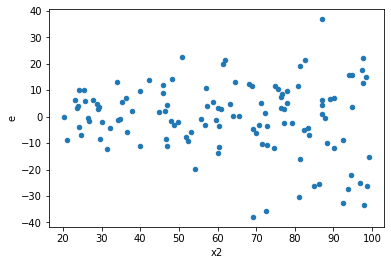

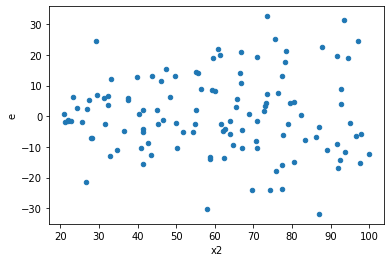

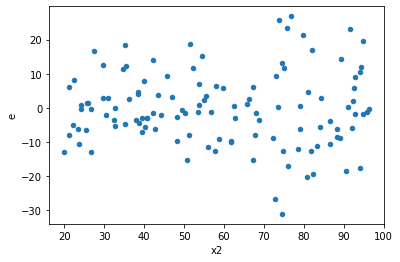

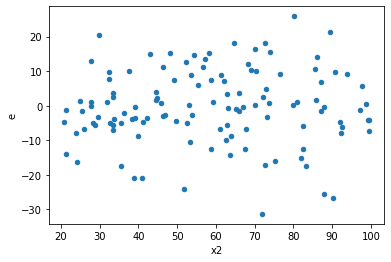

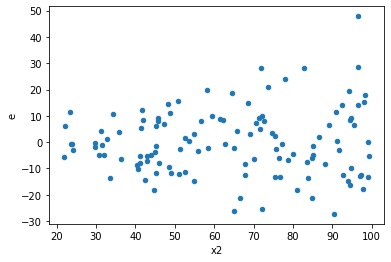

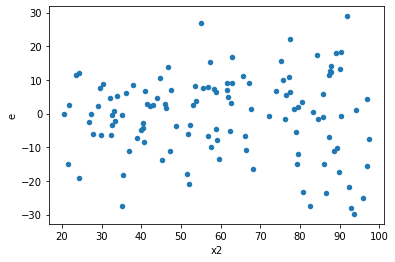

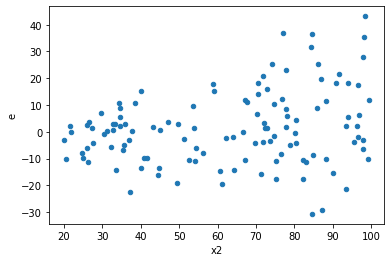

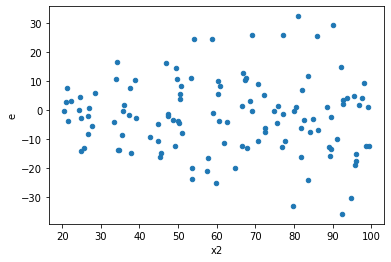

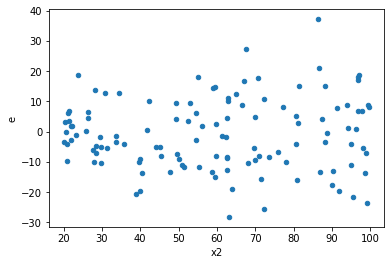

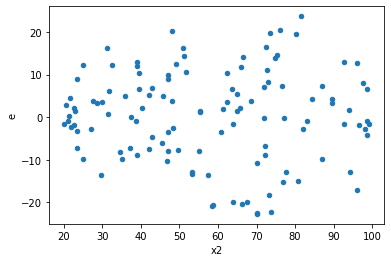

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,65.0,49.0,8341.641023336957,10244.557625333548,128.33293882056856,209.07260459864384,1.629142186878173,0.07593987733578156,0.9620300613321092,0.03796993866789078,Reject001=1 : Homoscedasticity
2.0,58.0,56.0,5823.362698068895,7639.340747543237,100.40280513911888,136.4167990632721,1.358695096957221,0.25135837459222365,0.8743208127038882,0.12567918729611183,Reject001=1 : Homoscedasticity
4.0,65.0,49.0,7766.847910136069,10444.3264934562,119.48996784824722,213.14952027461632,1.7838277481613949,0.03584780514550756,0.9820760974272462,0.01792390257275378,Reject001=1 : Homoscedasticity
6.0,50.0,64.0,4982.523107994565,14721.623009648021,99.6504621598913,230.02535952575033,2.308322054308887,0.001692313361621789,0.9991538433191891,0.0008461566808108945,Reject001=0 : Heteroscedasticity
8.0,57.0,57.0,5225.195914363505,9572.289144465145,91.67010376076324,167.93489727131833,1.831948371189671,0.023926235152812447,0.9880368824235938,0.011963117576406224,Reject001=1 : Homoscedasticity
9.0,68.0,46.0,6894.254111200397,5769.976663503129,101.38608987059408,125.43427529354629,1.2371941304142071,0.44639778091542825,0.7768011095422859,0.22319889045771413,Reject001=1 : Homoscedasticity
10.0,45.0,69.0,3539.054564007826,10764.2411461835,78.64565697795169,156.00349487222465,1.9836250451307214,0.010104668915780657,0.9949476655421097,0.005052334457890328,Reject001=1 : Homoscedasticity
12.0,53.0,61.0,5029.365921584829,13989.026296840882,94.89369663367603,229.3282999482112,2.4166863351683023,0.0009810708539530477,0.9995094645730235,0.0004905354269765239,Reject001=0 : Heteroscedasticity
17.0,66.0,48.0,6178.792274206375,7907.3861170177615,93.61806476070265,164.73721077120337,1.759673319377927,0.04136949430693315,0.9793152528465334,0.020684747153466576,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,50.0,64.0,8605.944284346793,10763.410125940069,172.11888568693587,168.17828321781357,0.9771053452188286,0.9399051762236394,Reject001=1 : Homoscedasticity
1.0,65.0,49.0,8341.641023336957,10244.557625333548,128.33293882056856,209.07260459864384,1.629142186878173,0.07593987733578156,Reject001=1 : Homoscedasticity
2.0,58.0,56.0,5823.362698068895,7639.340747543237,100.40280513911888,136.4167990632721,1.358695096957221,0.25135837459222365,Reject001=1 : Homoscedasticity
3.0,53.0,61.0,7279.304585632668,6121.715134266659,137.345369540239,100.35598580765016,0.7306834307089485,0.24462403355928097,Reject001=1 : Homoscedasticity
4.0,65.0,49.0,7766.847910136069,10444.3264934562,119.48996784824722,213.14952027461632,1.7838277481613949,0.03584780514550756,Reject001=1 : Homoscedasticity
5.0,67.0,47.0,11249.848213032017,5173.962374837876,167.90818228405996,110.08430584761439,0.6556220450375576,0.11151134021061379,Reject001=1 : Homoscedasticity
6.0,50.0,64.0,4982.523107994565,14721.623009648021,99.6504621598913,230.02535952575033,2.308322054308887,0.001692313361621789,Reject001=0 : Heteroscedasticity
7.0,53.0,61.0,10044.96126554352,9088.844375165429,189.52757104799093,148.99744877320376,0.7861518403329065,0.3722670447491774,Reject001=1 : Homoscedasticity
8.0,57.0,57.0,5225.195914363505,9572.289144465145,91.67010376076324,167.93489727131833,1.831948371189671,0.023926235152812447,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      806
Reject001=0 : Heteroscedasticity    194
Name: Result_test, dtype: int64